In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/kaggle/input/rsna-intracranial-aneurysm-detection/train.csv')

# Display shape and first few rows
print("Shape:", df.shape)
display(df.head())

# Show column names
print("\nColumns:", df.columns.tolist())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Ensure correct datatypes
df['PatientAge'] = pd.to_numeric(df['PatientAge'], errors='coerce')


Shape: (4405, 18)


,SeriesInstanceUID,PatientAge,PatientSex,Modality,Left Infraclinoid Internal Carotid Artery,Right Infraclinoid Internal Carotid Artery,Left Supraclinoid Internal Carotid Artery,Right Supraclinoid Internal Carotid Artery,Left Middle Cerebral Artery,Right Middle Cerebral Artery,Anterior Communicating Artery,Left Anterior Cerebral Artery,Right Anterior Cerebral Artery,Left Posterior Communicating Artery,Right Posterior Communicating Artery,Basilar Tip,Other Posterior Circulation,Aneurysm Present
0,1.2.826.0.1.3680043.8.498.10004044428023505108...,64,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.2.826.0.1.3680043.8.498.10004684224894397679...,76,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.2.826.0.1.3680043.8.498.10005158603912009425...,58,Male,CTA,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1.2.826.0.1.3680043.8.498.10009383108068795488...,71,Male,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.8.498.10012790035410518400...,48,Female,MRA,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Columns: ['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality', 'Left Infraclinoid Internal Carotid Artery', 'Right Infraclinoid Internal Carotid Artery', 'Left Supraclinoid Internal Carotid Artery', 'Right Supraclinoid Internal Carotid Artery', 'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery', 'Anterior Communicating Artery', 'Left Anterior Cerebral Artery', 'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery', 'Right Posterior Communicating Artery', 'Basilar Tip', 'Other Posterior Circulation', 'Aneurysm Present']

Missing values:
SeriesInstanceUID                             0
PatientAge                                    0
PatientSex                                    0
Modality                                      0
Left Infraclinoid Internal Carotid Artery     0
Right Infraclinoid Internal Carotid Artery    0
Left Supraclinoid Internal Carotid Artery     0
Right Supraclinoid Internal Carotid Artery    0
Left Middle Cerebral Artery          

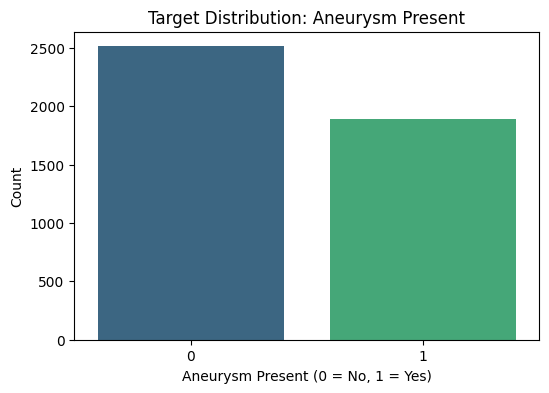

Aneurysm Present
0    57.026107
1    42.973893
Name: proportion, dtype: float64


In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Aneurysm Present', data=df, palette='viridis')
plt.title('Target Distribution: Aneurysm Present')
plt.xlabel('Aneurysm Present (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print(df['Aneurysm Present'].value_counts(normalize=True) * 100)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


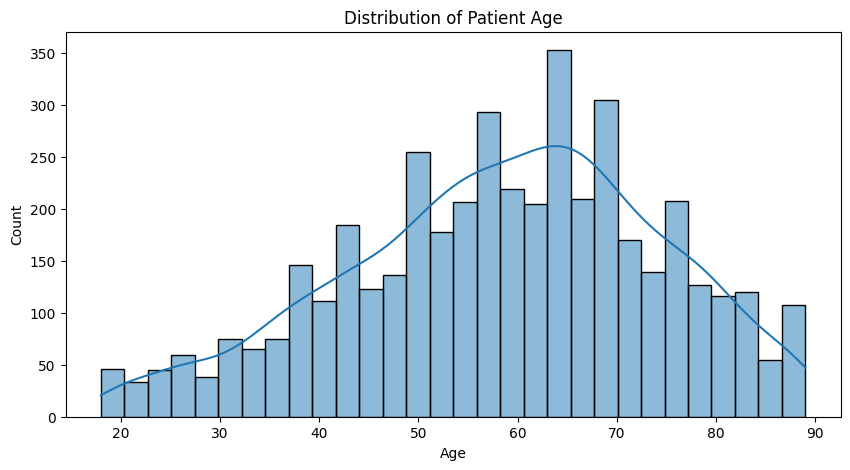

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

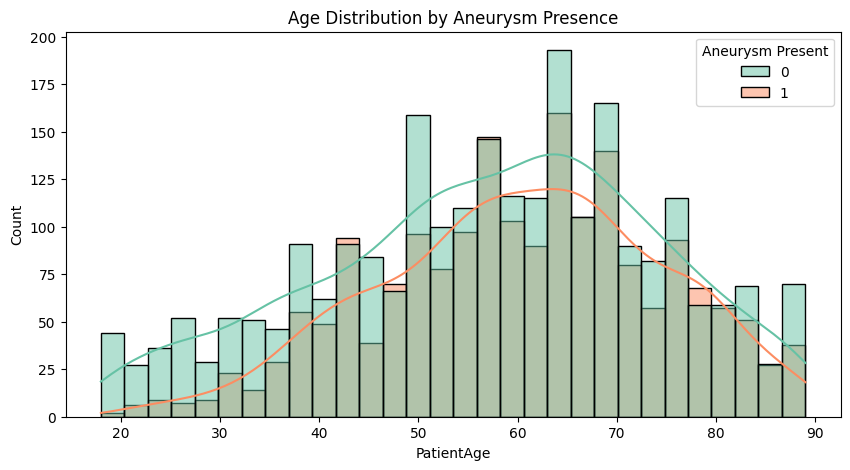

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['PatientAge'], bins=30, kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# By Aneurysm class
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='PatientAge', hue='Aneurysm Present', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Aneurysm Presence')
plt.show()


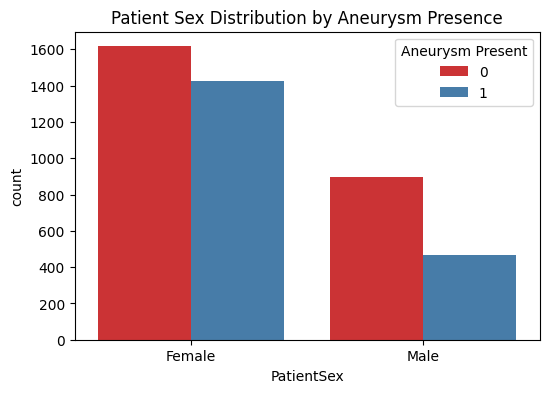

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PatientSex', hue='Aneurysm Present', palette='Set1')
plt.title('Patient Sex Distribution by Aneurysm Presence')
plt.show()


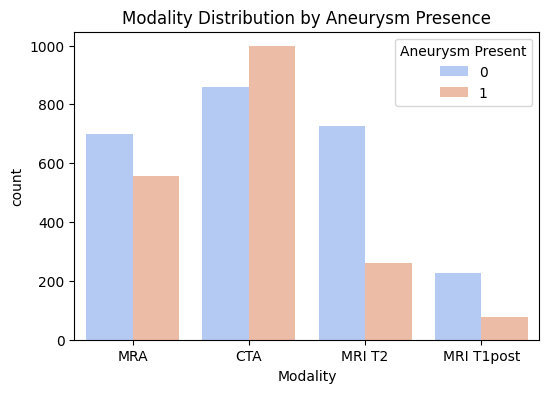

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Modality', hue='Aneurysm Present', palette='coolwarm')
plt.title('Modality Distribution by Aneurysm Presence')
plt.show()


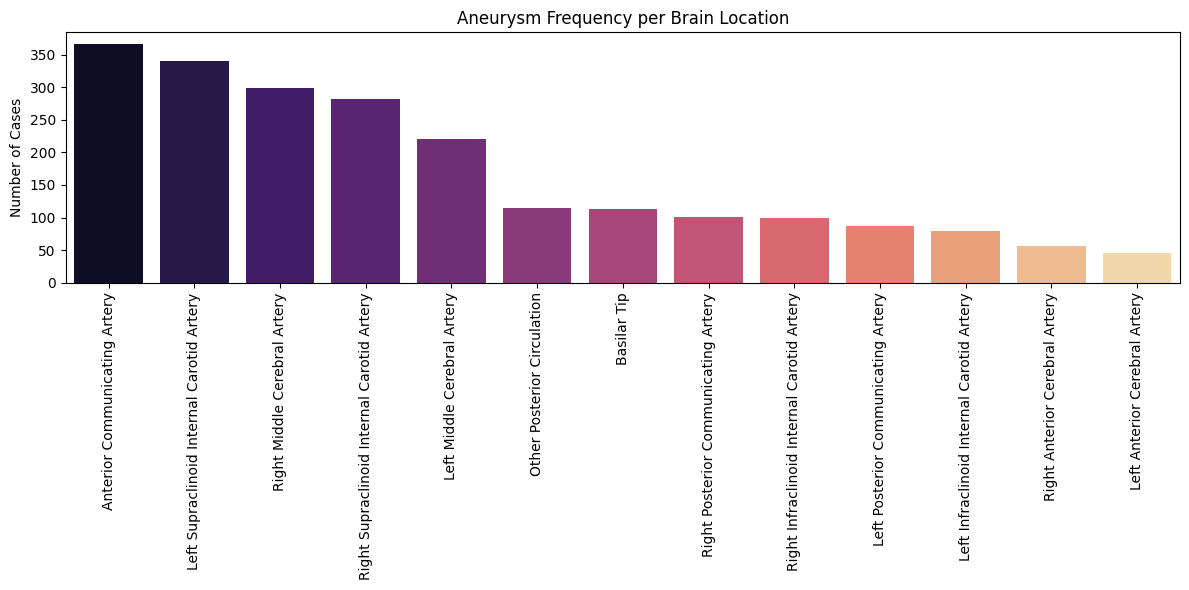

In [7]:
# Extract columns for anatomical locations
location_cols = df.columns[4:-1]  # From "Left Infraclinoid..." to "Other Posterior Circulation"

# Total count of positive aneurysms at each location
location_counts = df[location_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='magma')
plt.xticks(rotation=90)
plt.title('Aneurysm Frequency per Brain Location')
plt.ylabel('Number of Cases')
plt.tight_layout()
plt.show()


In [14]:
import os

# List the dataset root
print("Top-level input folders:")
print(os.listdir("/kaggle/input"))

# List the contents of the dataset folder
print("\nContents of rsna-intracranial-aneurysm-detection:")
print(os.listdir("/kaggle/input/rsna-intracranial-aneurysm-detection"))


Top-level input folders:
['rsna-intracranial-aneurysm-detection']

Contents of rsna-intracranial-aneurysm-detection:
['train_localizers.csv', 'segmentations', 'series', 'train.csv', 'kaggle_evaluation']


Loaded labels: (4405, 18)
Index(['SeriesInstanceUID', 'PatientAge', 'PatientSex', 'Modality',
       'Left Infraclinoid Internal Carotid Artery',
       'Right Infraclinoid Internal Carotid Artery',
       'Left Supraclinoid Internal Carotid Artery',
       'Right Supraclinoid Internal Carotid Artery',
       'Left Middle Cerebral Artery', 'Right Middle Cerebral Artery',
       'Anterior Communicating Artery', 'Left Anterior Cerebral Artery',
       'Right Anterior Cerebral Artery', 'Left Posterior Communicating Artery',
       'Right Posterior Communicating Artery', 'Basilar Tip',
       'Other Posterior Circulation', 'Aneurysm Present'],
      dtype='object')
Checking for DICOM presence in each series... this can take a while.
Total series: 4405
Series with DICOM images (decom): 4405
Series without DICOM images (nil): 0


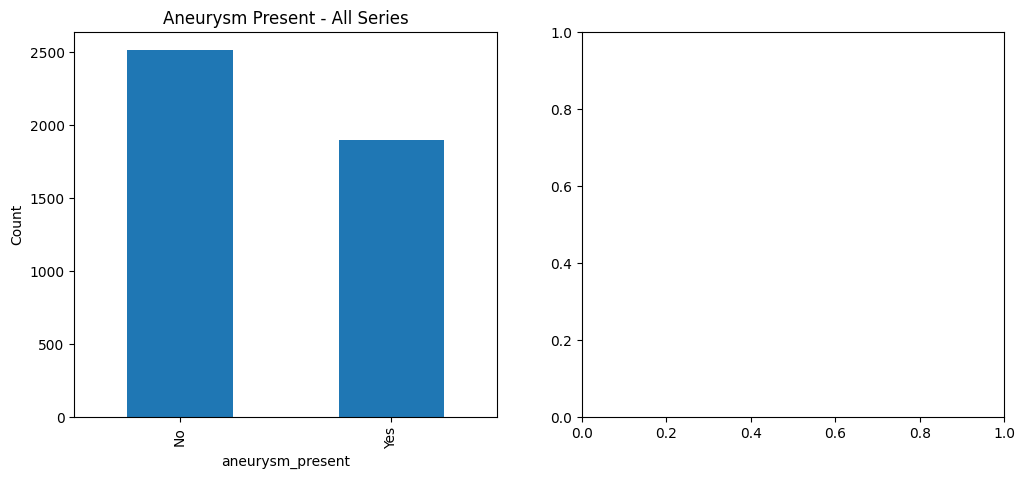

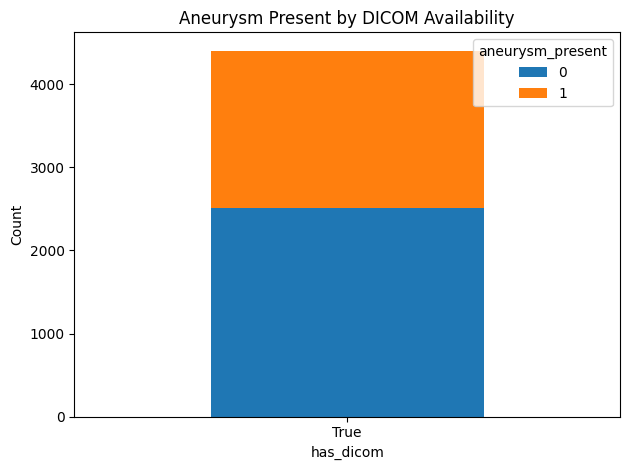

Visualizing some random DICOM series slices:


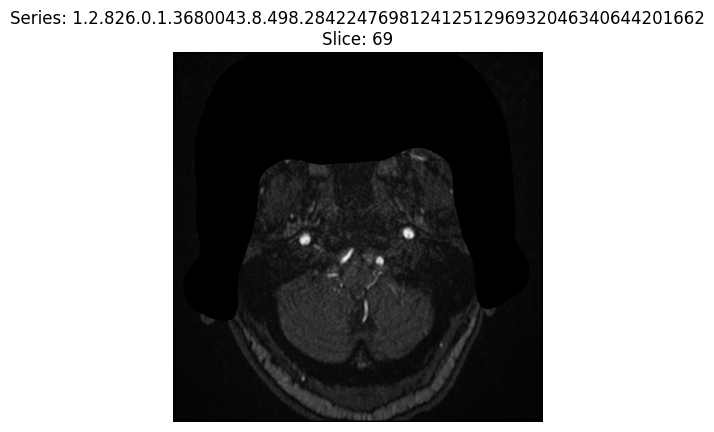

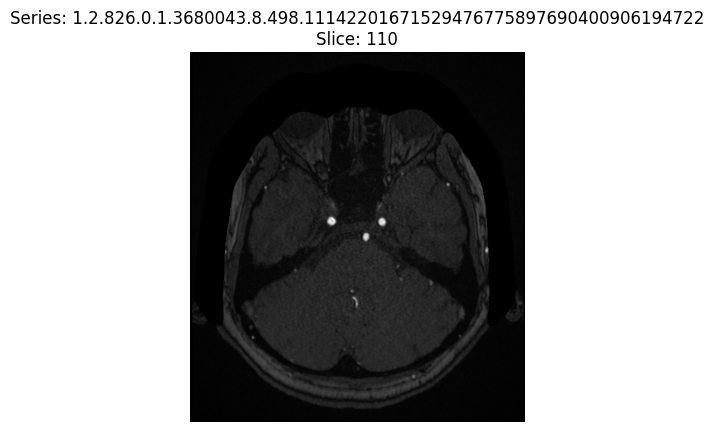

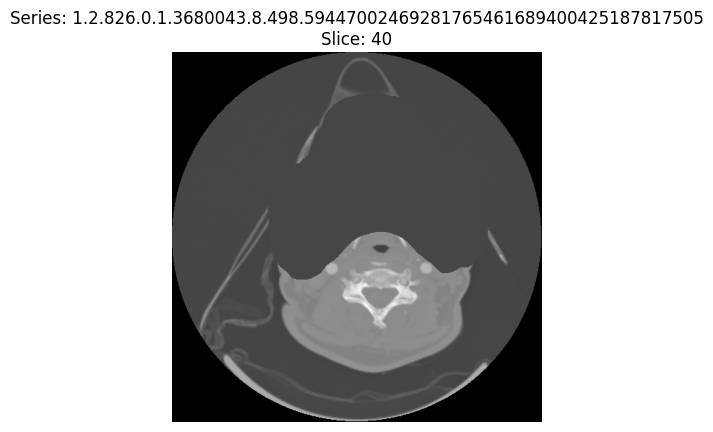

Error loading series 1.2.826.0.1.3680043.8.498.66632898697414957985241002779153744835: all input arrays must have the same shape


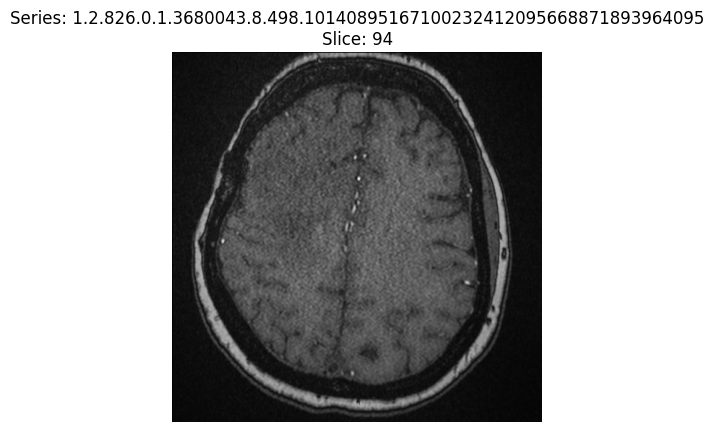

In [2]:
import os
import glob
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import random

# Paths
BASE_PATH = "/kaggle/input/rsna-intracranial-aneurysm-detection"
SERIES_PATH = os.path.join(BASE_PATH, "series")
LABELS_CSV = os.path.join(BASE_PATH, "train.csv")

# Load labels
df = pd.read_csv(LABELS_CSV)
print(f"Loaded labels: {df.shape}")
print(df.columns)

# Rename for convenience
df = df.rename(columns={'SeriesInstanceUID': 'series_id', 'Aneurysm Present': 'aneurysm_present'})

# Check which series have DICOM files
def check_series_dicom(series_id):
    folder = os.path.join(SERIES_PATH, series_id)
    if not os.path.exists(folder):
        return False
    files = glob.glob(os.path.join(folder, "*.dcm"))
    return len(files) > 0

# Create a new column 'has_dicom'
print("Checking for DICOM presence in each series... this can take a while.")
df['has_dicom'] = df['series_id'].apply(check_series_dicom)

# Summary stats
total_series = len(df)
series_with_dicom = df['has_dicom'].sum()
series_without_dicom = total_series - series_with_dicom

print(f"Total series: {total_series}")
print(f"Series with DICOM images (decom): {series_with_dicom}")
print(f"Series without DICOM images (nil): {series_without_dicom}")

# Label distribution (aneurysm present) overall and by decom/nil groups
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['aneurysm_present'].value_counts().plot(kind='bar')
plt.title("Aneurysm Present - All Series")
plt.xticks(ticks=[0,1], labels=['No', 'Yes'])
plt.ylabel("Count")

plt.subplot(1,2,2)
df.groupby('has_dicom')['aneurysm_present'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title("Aneurysm Present by DICOM Availability")
plt.xticks(rotation=0)
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Function to load and show a middle DICOM slice from a series
def visualize_middle_slice(series_id):
    folder = os.path.join(SERIES_PATH, series_id)
    dicom_files = sorted(glob.glob(os.path.join(folder, "*.dcm")))
    if len(dicom_files) == 0:
        print(f"No DICOM files found in series {series_id}")
        return
    try:
        slices = [pydicom.dcmread(f).pixel_array for f in dicom_files]
        volume = np.stack(slices, axis=0)
        mid_idx = volume.shape[0] // 2
        plt.imshow(volume[mid_idx], cmap='gray')
        plt.title(f"Series: {series_id}\nSlice: {mid_idx}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Error loading series {series_id}: {e}")

# Visualize some random samples with DICOMs
print("Visualizing some random DICOM series slices:")
sample_series = df[df['has_dicom']].sample(min(5, series_with_dicom))
for sid in sample_series['series_id']:
    visualize_middle_slice(sid)
